<a href="https://colab.research.google.com/github/Poornimatagaram/Machine_learning_Projects/blob/main/image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics -q


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path to your folder inside Google Drive
folder = "/content/drive/MyDrive/250530_ClutterAnalysis/IMGS"


In [ ]:
from ultralytics import YOLO
import os

def analyze_directory(folder_path):
    model = YOLO("yolov8n.pt")  # You can change model type (e.g., yolov8s.pt)

    # Run detection
    results = model.predict(source=folder_path, save=True)

    # Count objects in each image
    for r in results:
        print(f"\n📸 Image: {r.path}")
        object_counts = {}
        for cls_id in r.boxes.cls.cpu().numpy():
            class_name = model.names[int(cls_id)]
            object_counts[class_name] = object_counts.get(class_name, 0) + 1

        for name, count in object_counts.items():
            print(f"- {name}: {count}")


In [ ]:
analyze_directory(folder)



image 1/13 /content/drive/MyDrive/250530_ClutterAnalysis/IMGS/8hXmgPB4AuTYSCjDzY_QNw_270.jpg: 448x640 14 persons, 1 suitcase, 577.9ms
image 2/13 /content/drive/MyDrive/250530_ClutterAnalysis/IMGS/8hXmgPB4AuTYSCjDzY_QNw_90.jpg: 448x640 8 persons, 1 car, 1 bus, 1 truck, 280.5ms
image 3/13 /content/drive/MyDrive/250530_ClutterAnalysis/IMGS/U_D5pBKcE62DxjRKw4tXlA_270.jpg: 448x640 1 person, 1 bicycle, 2 cars, 1 bus, 165.0ms
image 4/13 /content/drive/MyDrive/250530_ClutterAnalysis/IMGS/V0gi9gdA18pGpmGofV2Q-Q_0.jpg: 448x640 3 persons, 1 car, 3 umbrellas, 163.1ms
image 5/13 /content/drive/MyDrive/250530_ClutterAnalysis/IMGS/Wgp2RcM6-gE47bqXDnqbVQ_90.jpg: 448x640 1 car, 1 train, 154.7ms
image 6/13 /content/drive/MyDrive/250530_ClutterAnalysis/IMGS/YICniQ_5msoU4fpRQBs7vw_270.jpg: 448x640 4 persons, 9 cars, 147.7ms
image 7/13 /content/drive/MyDrive/250530_ClutterAnalysis/IMGS/YfInkGYYfaaV3ajbyf6pRg_90.jpg: 448x640 1 car, 1 motorcycle, 1 umbrella, 1 chair, 149.3ms
image 8/13 /content/drive/MyDriv

In [ ]:
import cv2
import os
from ultralytics import YOLO

# Load model
model = YOLO('yolov8n.pt')

# Path to your image folder
folder_path = '/content/drive/MyDrive/250530_ClutterAnalysis/IMGS'
output_folder = '/content/drive/MyDrive/250530_ClutterAnalysis/annotated_images'
os.makedirs(output_folder, exist_ok=True)

# Get list of image paths
image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Inference and draw bounding boxes
for image_path in image_paths:
    img = cv2.imread(image_path)
    results = model(image_path)[0]  # Single image result

    for box in results.boxes:
        cls_id = int(box.cls)
        label = model.names[cls_id]
        conf = box.conf.item()
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        # Draw bounding box
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        # Label
        cv2.putText(img, f'{label} {conf:.2f}', (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    # Save annotated image
    save_path = os.path.join(output_folder, os.path.basename(image_path))
    cv2.imwrite(save_path, img)

print("✅ Annotated images saved to:", output_folder)



image 1/1 /content/drive/MyDrive/250530_ClutterAnalysis/IMGS/YICniQ_5msoU4fpRQBs7vw_270.jpg: 448x640 4 persons, 9 cars, 847.2ms
Speed: 4.6ms preprocess, 847.2ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/drive/MyDrive/250530_ClutterAnalysis/IMGS/xXYTrr4Tm2KBevYMDA07tg_90.jpg: 448x640 3 cars, 1 bus, 1 truck, 786.5ms
Speed: 8.5ms preprocess, 786.5ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/drive/MyDrive/250530_ClutterAnalysis/IMGS/YfInkGYYfaaV3ajbyf6pRg_90.jpg: 448x640 1 car, 1 motorcycle, 1 umbrella, 1 chair, 609.1ms
Speed: 10.6ms preprocess, 609.1ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/drive/MyDrive/250530_ClutterAnalysis/IMGS/V0gi9gdA18pGpmGofV2Q-Q_0.jpg: 448x640 3 persons, 1 car, 3 umbrellas, 570.5ms
Speed: 4.9ms preprocess, 570.5ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/drive/MyDrive/250530_ClutterAnalysi

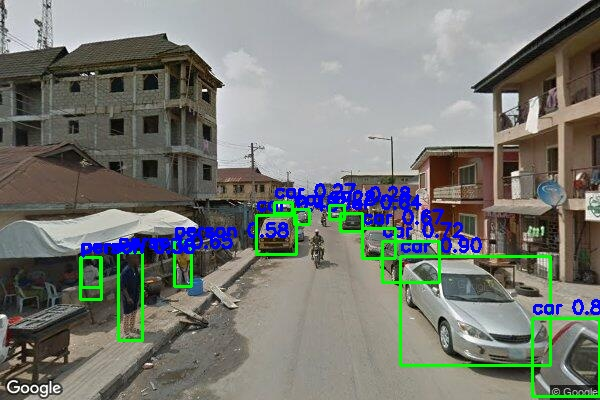

In [ ]:
from IPython.display import Image, display

# Display one annotated image
display(Image(filename=os.path.join(output_folder, os.listdir(output_folder)[0])))


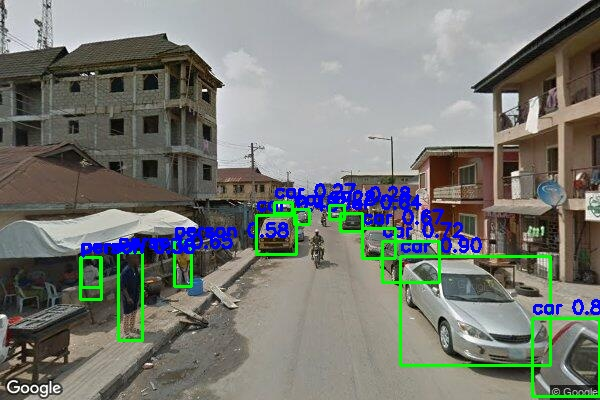

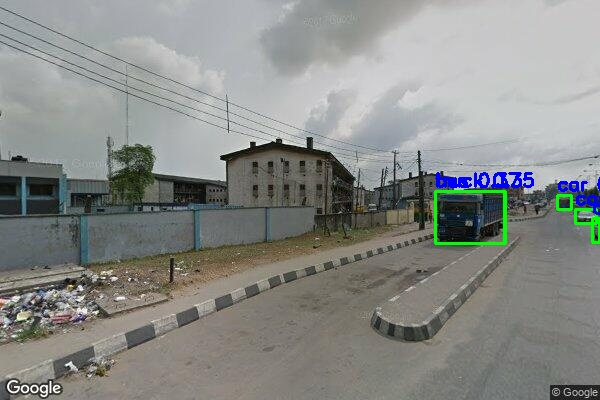

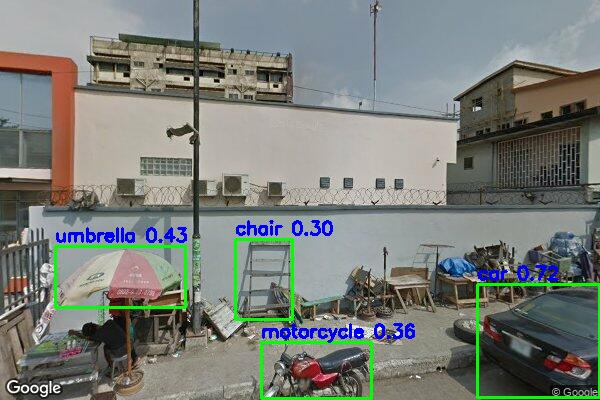

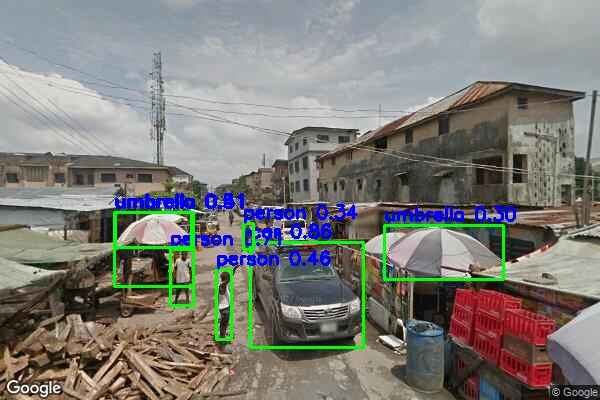

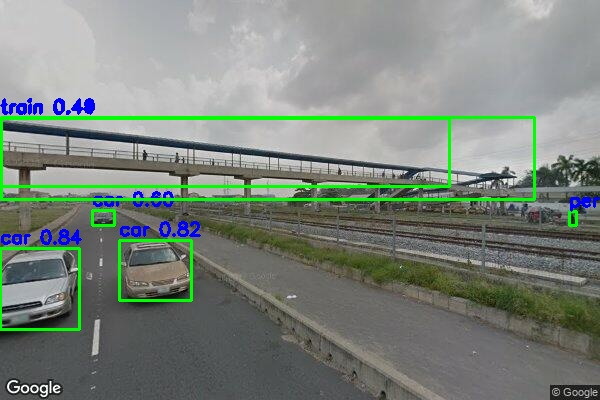

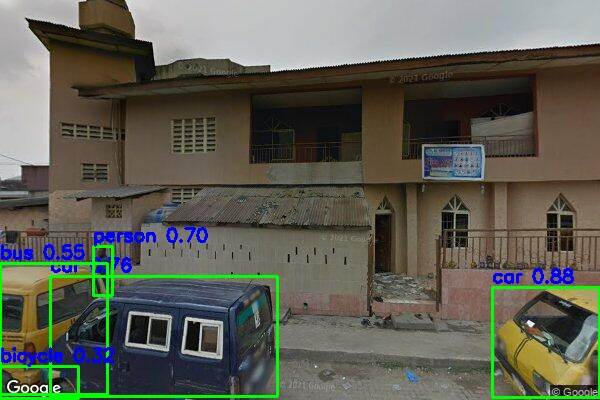

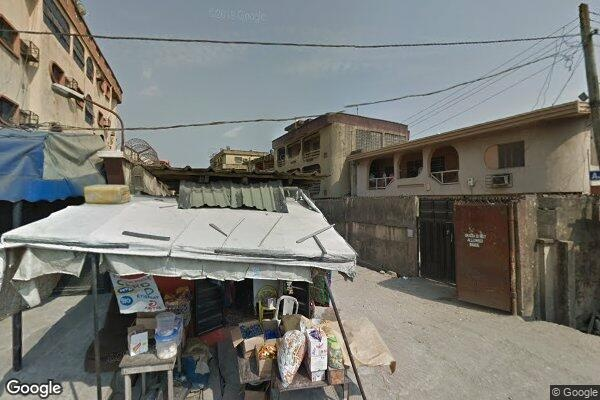

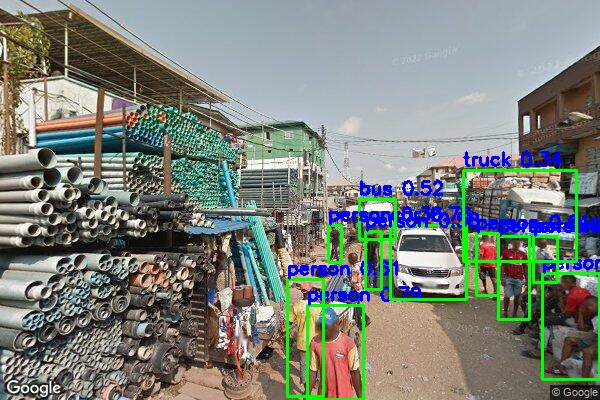

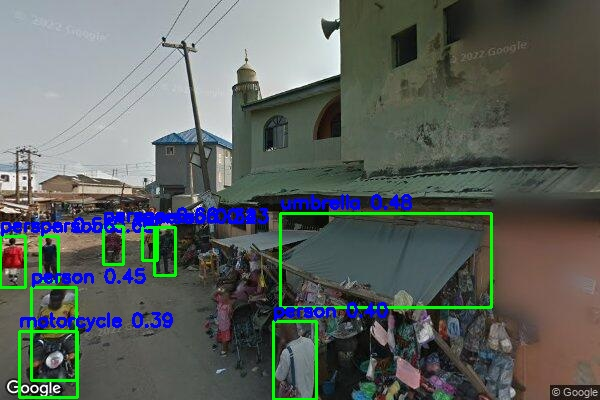

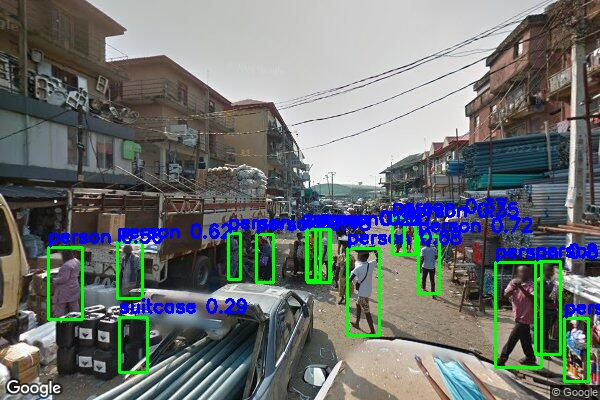

In [ ]:
from IPython.display import Image, display

for img in os.listdir(output_folder)[:10]:
    display(Image(filename=os.path.join(output_folder, img)))


In [ ]:
import cv2
import os
import csv
from ultralytics import YOLO
from collections import defaultdict

# Load YOLOv8 model
model = YOLO('yolov8n.pt')

# Input & output paths
input_folder = '/content/drive/MyDrive/250530_ClutterAnalysis/IMGS'
output_folder = '/content/drive/MyDrive/250530_ClutterAnalysis/annotated_images'
csv_path = '/content/drive/MyDrive/250530_ClutterAnalysis/detection_results.csv'
summary_csv_path = '/content/drive/MyDrive/250530_ClutterAnalysis/image_summary.csv'

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Initialize CSV data containers
detection_data = []
summary_data = []

# List images
image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for img_file in image_files:
    img_path = os.path.join(input_folder, img_file)
    output_path = os.path.join(output_folder, img_file)
    image = cv2.imread(img_path)

    # Run YOLO detection
    results = model(img_path)[0]

    # Dictionary to count objects in this image
    image_counts = defaultdict(int)

    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = box.conf.item()
        cls_id = int(box.cls.item())
        label = model.names[cls_id]

        # Save detection row
        detection_data.append([img_file, label, conf, x1, y1, x2, y2])
        image_counts[label] += 1

        # Draw box
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, f"{label} {conf:.2f}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (36, 255, 12), 2)

    # Save annotated image
    cv2.imwrite(output_path, image)

    # Save summary for this image
    for obj_class, count in image_counts.items():
        summary_data.append([img_file, obj_class, count])

# Write detailed CSV
with open(csv_path, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['image', 'class', 'confidence', 'x1', 'y1', 'x2', 'y2'])
    writer.writerows(detection_data)

# Write summary CSV
with open(summary_csv_path, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['image', 'class', 'count'])
    writer.writerows(summary_data)

print(f"✅ Done! Detection results saved to:\n- {csv_path}\n- {summary_csv_path}")



image 1/1 /content/drive/MyDrive/250530_ClutterAnalysis/IMGS/YICniQ_5msoU4fpRQBs7vw_270.jpg: 448x640 4 persons, 9 cars, 191.7ms
Speed: 10.5ms preprocess, 191.7ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/drive/MyDrive/250530_ClutterAnalysis/IMGS/xXYTrr4Tm2KBevYMDA07tg_90.jpg: 448x640 3 cars, 1 bus, 1 truck, 154.6ms
Speed: 2.9ms preprocess, 154.6ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/drive/MyDrive/250530_ClutterAnalysis/IMGS/YfInkGYYfaaV3ajbyf6pRg_90.jpg: 448x640 1 car, 1 motorcycle, 1 umbrella, 1 chair, 160.9ms
Speed: 3.3ms preprocess, 160.9ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/drive/MyDrive/250530_ClutterAnalysis/IMGS/V0gi9gdA18pGpmGofV2Q-Q_0.jpg: 448x640 3 persons, 1 car, 3 umbrellas, 160.3ms
Speed: 2.8ms preprocess, 160.3ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/drive/MyDrive/250530_ClutterAnalysi